# Analisis de las cuencas hidrográficas
## Versión SC

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob # To make code easily replicable
import numpy as np

In [77]:
cwd = dir_path = os.path.abspath('')
plt.rcParams['agg.path.chunksize'] = 10000



In [3]:
cwd

'C:\\Users\\c-ba7\\Documents\\Github\\Challenges\\Cuencas'

In [119]:
base_path = cwd + "\\caudal_extra.csv"
base = pd.read_csv(base_path)
base["fecha"] = base["fecha"].astype('datetime64[ns]')

In [26]:
base.describe()

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


In [27]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   Unnamed: 0              1411180 non-null  int64         
 1   codigo_estacion         1411180 non-null  int64         
 2   institucion             1411180 non-null  object        
 3   fuente                  1411180 non-null  object        
 4   nombre                  1411180 non-null  object        
 5   altura                  1411180 non-null  int64         
 6   latitud                 1411180 non-null  float64       
 7   longitud                1411180 non-null  float64       
 8   codigo_cuenca           1411180 non-null  int64         
 9   nombre_sub_cuenca       1411180 non-null  object        
 10  cantidad_observaciones  1411180 non-null  int64         
 11  fecha                   1411180 non-null  datetime64[ns]
 12  caudal        

In [7]:
base.codigo_cuenca.nunique()

29

In [47]:
treat = base.head(100000)

# Creamos una BD con solo no valores numericos
base_obj = base.select_dtypes(include=[object, 'datetime'])
base_num = base.drop(base.select_dtypes(include=[object, 'datetime']),axis=1)
base_num

,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
0,0,4540001,310,-30.683300,-71.050003,45,11575,0.812,4540001,0.00,NaN
1,1,4540001,310,-30.683300,-71.050003,45,11575,0.236,4540001,0.00,NaN
2,2,4540001,310,-30.683300,-71.050003,45,11575,0.730,4540001,0.00,NaN
3,3,4540001,310,-30.683300,-71.050003,45,11575,3.590,4540001,0.00,NaN
4,4,4540001,310,-30.683300,-71.050003,45,11575,1.370,4540001,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1411175,1411175,7322001,90,-35.557499,-71.706703,73,18006,46.885,7322001,0.00,12.975000
1411176,1411176,7322001,90,-35.557499,-71.706703,73,18006,195.978,7322001,0.00,22.665714
1411177,1411177,7322001,90,-35.557499,-71.706703,73,18006,124.327,7322001,1.91,20.757143
1411178,1411178,7322001,90,-35.557499,-71.706703,73,18006,23.682,7322001,0.00,27.598333


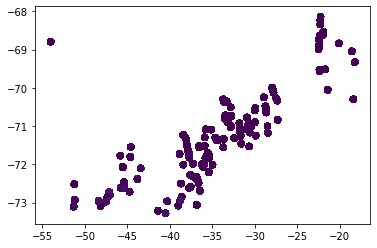

In [29]:
plt.scatter(base["latitud"], base["longitud"], c = base["caudal"] )

(array([1.405644e+06, 4.692000e+03, 5.980000e+02, 1.590000e+02,
        5.700000e+01, 1.500000e+01, 8.000000e+00, 2.000000e+00,
        4.000000e+00, 1.000000e+00]),
 array([    0. ,  1580.5,  3161. ,  4741.5,  6322. ,  7902.5,  9483. ,
        11063.5, 12644. , 14224.5, 15805. ]),
 <a list of 10 Patch objects>)

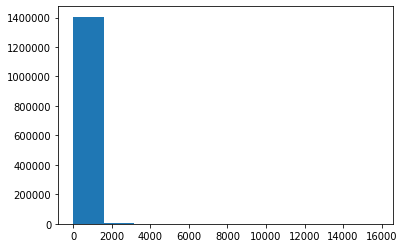

In [15]:
plt.hist(base_num["caudal"], bins = 10)

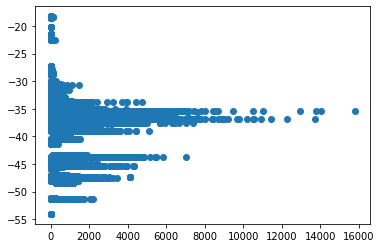

In [19]:
plt.scatter(base_num["caudal"], base_num["latitud"])

In [34]:
def time_plot_una_estacion(base, codigo_estacion, columna, fecha_min, fecha_max):
#     if base[columna] == "O":
#         return("No se puede plotear un valor no numérico")
    test = base[(base["codigo_estacion"] == codigo_estacion) &
               (base["fecha"] > fecha_min) &
                (base["fecha"] < fecha_max)
               ]
    
    plt.plot(test["fecha"], test[columna])
    return(test)
    


In [82]:
from sklearn.preprocessing import MinMaxScaler

def time_plot_varias_estacion(base, codigo_estacion, columnas, fecha_min, fecha_max):
#     if base[columna] == "O":
#         return("No se puede plotear un valor no numérico")
    test = base[(base["codigo_estacion"] == codigo_estacion) &
               (base["fecha"] > fecha_min) &
                (base["fecha"] < fecha_max)
               ]
    test = test.sort_values("fecha")
    scaler = MinMaxScaler() 
    plt.figure()
    for col in columnas:
        test[col] =  test[col] = (test[col] - test[col].min()) / (test[col].max() - test[col].min())
        plt.plot(test["fecha"], test[col])
    plt.show()
    return()

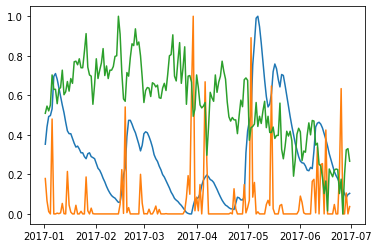

()

In [83]:
time_plot_varias_estacion(base, 11335002,  ["caudal","precip_promedio", "temp_max_promedio"], "2017-01-01", "2017-07-01")

In [120]:
Seasons = {10:"Primavera",11:"Primavera",12:"Primavera",1:"Verano",2:"Verano",3:"Verano",4:"Otoño",5:"Otoño",6:"Otoño",7:"Invierno",8:"Invierno",9:"Invierno"}
base["Season"] = base['fecha'].apply(lambda x: Seasons[x.month])

In [85]:
base

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,Season
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06,0.000051,4540001,Rio Grande En Paloma 1,0.000000,NaN,Verano
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27,0.000015,4540001,Rio Grande En Paloma 1,0.000000,NaN,Verano
2,2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07,0.000046,4540001,Rio Grande En Paloma 1,0.000000,NaN,Otoño
3,3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30,0.000227,4540001,Rio Grande En Paloma 1,0.000000,NaN,Otoño
4,4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.683300,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22,0.000087,4540001,Rio Grande En Paloma 1,0.000000,NaN,Invierno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411175,1411175,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-10,0.002966,7322001,Rio Maule En Longitudinal,0.000000,0.528902,Primavera
1411176,1411176,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2017-10-14,0.012400,7322001,Rio Maule En Longitudinal,0.000000,0.688947,Primavera
1411177,1411177,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-04,0.007866,7322001,Rio Maule En Longitudinal,0.007386,0.657426,Verano
1411178,1411178,7322001,DGA,dga_web,Rio Maule En Longitudinal,90,-35.557499,-71.706703,73,Rio Maule Medio (Entre Rio Claro Y Rio Loncomi...,18006,2018-01-29,0.001498,7322001,Rio Maule En Longitudinal,0.000000,0.770410,Verano


In [123]:
base_q5 = base

In [124]:
data_agrupada = base.groupby(["Season","codigo_cuenca"])
caudal_max_95 = data_agrupada["caudal"].quantile(0.95)
precipitacion_max_95= data_agrupada["precip_promedio"].quantile(0.95)
temperatura_max_95= data_agrupada["temp_max_promedio"].quantile(0.95)



In [125]:
precipitacion_max_95

Season    codigo_cuenca
Invierno  10                0.000000
          12                0.000000
          21                0.000000
          32                0.033333
          34                0.000000
                             ...    
Verano    113               8.633452
          115               6.600000
          117              11.000000
          122               5.900000
          128               6.380000
Name: precip_promedio, Length: 116, dtype: float64

In [100]:
precipitacion_max_95["Invierno"][115]

0.03209590098544863

In [104]:
def label(row):
    c = 0
    t = 0
    p = 0
    if row["caudal"] > caudal_max_95[row["Season"]][row["codigo_cuenca"]]:
        c = 1
    if row["temp_max_promedio"] > temperatura_max_95[row["Season"]][row["codigo_cuenca"]]:
        t = 1
    if row["precip_promedio"] > precipitacion_max_95[row["Season"]][row["codigo_cuenca"]]:
        p = 1
    return([c,t,p])
    

In [107]:
t5 = base_q5.head(100000)

In [110]:
t5_o = base_q5.apply(lambda row: label(row), axis=1)

KeyboardInterrupt: 

In [ ]:
base_q5["caudal_extremo"] = base_q5["caudal"].map

In [129]:
base_q5["caudal_95"] = 0
base_q5["temp_95"] = 0
base_q5["precip_95"] = 0

In [130]:
for temp in base_q5.Season.unique():
    for cod in base_q5.codigo_cuenca.unique():
        base_q5.loc[(base_q5["Season"] == temp) & (base_q5["codigo_cuenca"] == cod), "caudal_95"] = caudal_max_95[temp][cod]
        base_q5.loc[(base_q5["Season"] == temp) & (base_q5["codigo_cuenca"] == cod), "temp_95"] = temperatura_max_95[temp][cod]
        base_q5.loc[(base_q5["Season"] == temp) & (base_q5["codigo_cuenca"] == cod), "precip_95"] = precipitacion_max_95[temp][cod]
        

In [122]:
base["Season"].unique()

array(['Verano', 'Otoño', 'Invierno', 'Primavera'], dtype=object)

In [131]:
base_q5.head()

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,...,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,Season,caudal_95,temp_95,precip_95
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-01-06,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN,Verano,13.76,31.200001,0.000000
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-03-27,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN,Verano,13.76,31.200001,0.000000
2,2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-05-07,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN,Otoño,12.00,28.500000,2.166667
3,3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-06-30,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN,Otoño,12.00,28.500000,2.166667
4,4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),...,1960-07-22,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN,Invierno,23.40,27.500000,4.560197


In [135]:
base_q5["caudal_95"] = np.where(base_q5["caudal"] > base_q5["caudal_95"], 1,0)

base_q5["precip_95"] = np.where(base_q5["precip_promedio"] > base_q5["precip_95"], 1,0)

base_q5["temp_95"] = np.where(base_q5["temp_max_promedio"] > base_q5["temp_95"], 1,0)

In [137]:
base_q5.caudal_95.sum()

70283